# Chapter 2 Realistic Projectile Motion         

*蔡浩*    
*hcai@whu.edu.cn*

# 2.1 Bicycle racing: the effect of air resistance

## ODE (ordinary differential equation)

- motion of bicycle, projectile motion, the thajectory of shell, ... ...

- Euler method

<img src="http://caihaopics.oss-cn-hangzhou.aliyuncs.com/18-9-28/57468626.jpg" width=60%/>

## Newton's second law

- Newton's second law
  $$\frac{dv}{dm}=\frac{F}{m}$$

- the mechanics of a bicycle?    

<img src="http://caihaopics.oss-cn-hangzhou.aliyuncs.com/18-9-28/20194452.jpg" alt="https://upload.wikimedia.org/wikipedia/commons/thumb/8/8a/Bicycle_diagram-en.svg/850px-Bicycle_diagram-en.svg.png![image.png](attachment:image.png)" width=60%/>

<img alt="http://physicalcycling.com/wp-content/uploads/2018/01/DrriveTrain01.jpg" src="http://caihaopics.oss-cn-hangzhou.aliyuncs.com/18-9-28/85322880.jpg" width=60%/>

- *It's hard to derive an accurate expression for $F$.*

## Energy and Power

- Another form of Newton's second law
  $$\frac{dE}{dt}=P$$
  where $E$ is the total energy of the bicycle-rider combination, and $P$ is the power output of the rider.

- $E$ is about 400 watts for a typical bicycle-racing athlete

- $v/P$ relation
  $$E=\frac{1}{2}mv^2,~~~\frac{dE}{dt}=mv\frac{dv}{dt}$$
  $$\frac{dv}{dt}=\frac{P}{mv}$$

- analytical solution
  $$\int_{v_0}^v v'dv'=\int_0^t\frac{P}{m}dt'$$
  $$v=\sqrt{v_0^2+2Pt/m}$$

## "unphysical" solution

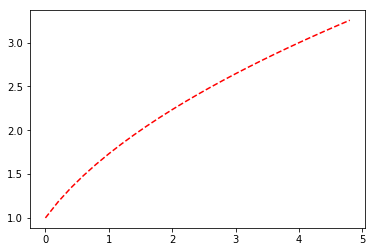

In [17]:
import numpy as np
import matplotlib.pyplot as plt
# evenly sampled time at 200ms intervals
t = np.arange(0., 5., 0.2)
# red dashes, blue squares and green triangles
v0 = 1.0; P = 1.0; m = 1.0;
plt.plot(t, np.sqrt(1+2*P*t/m), 'r--') 
plt.show()

## Euler method

- finite difference form
  $$\frac{dv}{dt}\approx\frac{v_{i+1}-v_i}{\Delta t}$$
  where $\Delta t$ is the small, discrete step size, and $v_i$ is the velocity at time $t_i\equiv i\Delta t$.

- Euler method
  $$v_{i+1}=v_i+\frac{P}{mv_i}\Delta t$$

- *approximation* $\to$ the leading correcting terms are propotional to $(\Delta t)^2$

## How to choose numerical method?

There are many other methods for ODE described in Appendix A. 

- methods that are more powerful than the Euler method do indeed exists;

- these more powerful methods can cerntainly be used to solve all of the problems in this book where we use the Euler method;

- if you are going to do this sort of thing for a living it is might consider a quick-and-dirty approach, we are *not trying* to minimize the importance of other algorithms.

## Example 2.1 Pseudocode for bicycle calculation

- `main program`

  - Declare necessary variables, including arrays $t()$ and $v()$ to store time and velocity.

  - Set values for the power $P$, mass $m$, and time step $\Delta t$, and total number of time steps $N$, along with the initial value for the velocity $(v_0)$.

  - Do the actual calculation.

  - Store the results (Show!!!)

- `calculate` subroutine

  - For each time step $i$ calculate $v$ and $t$ at step $i+1$:
    $$v_{i+1}=v_i+\left(\frac{P}{mv_i}\right)\Delta t$$
    $$t_{i+1}=t_i+\Delta t$$

  - Repeat for $N$ time steps.

In [7]:
class bicycle:
    def __init__(self, power, mass,\
                 time_step, total_time, initial_velocity):
        pass
    def run(self):
        pass
    def show_results(self):
        pass

In [8]:
    def __init__(self, power=10, mass=1, time_step=0.1,\
                 total_time=20, initial_velocity=1):
        self.v = [initial_velocity]
        self.t = [0]
        self.m = mass
        self.p = power
        self.dt = time_step
        self.time = total_time

In [9]:
    def run(self):
        _time = 0
        while(_timer < self.time):
            self.v.append(self.v[-1] +\
                          self.dt * self.p / (self.m * self.v[-1]))
            self.t.append(_time)
            _time += self.dt

In [10]:
    def show_results(self):
        pl.plot(self.t, self.v)
        pl.xlabel('time ($s$)')
        pl.ylabel('velocity')
        pl.show()

In [11]:
import pylab as pl
class bicycle:
    def __init__(self, power=10, mass=1, time_step=0.1,\
                 total_time=20, initial_velocity=1):
        self.v = [initial_velocity]
        self.t = [0]
        self.m = mass
        self.p = power
        self.dt = time_step
        self.time = total_time   
    def run(self):
        _time = 0
        while(_time < self.time):
            self.v.append(self.v[-1] +\
                          self.dt * self.p / (self.m * self.v[-1]))
            self.t.append(_time)
            _time += self.dt    
    def show_results(self):
        font = {'family': 'serif',
                'color':  'darkred',
                'weight': 'normal',
                'size': 16,
        }
        pl.plot(self.t, self.v)
        pl.title('Bicycling without air resistance', fontdict = font)
        pl.xlabel('time ($s$)')
        pl.ylabel('velocity')
        pl.text(0.2 * self.time, 0.9 * self.v[-1],\
                'velocity with time', fontdict = font)
        pl.show()

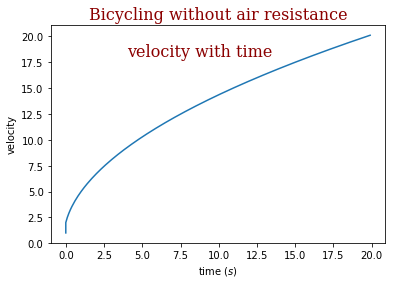

In [12]:
a = bicycle()
a.run()
a.show_results()

## How to choose $\Delta t$?

- **A useful rule**  
  *one percent of any time scales in the problem, and then repeat the calculation with several smaller values*

- **trade-off**  
  *more accurate results, but a computational time proportional to $(\Delta t)^{-1}$*

## "frictionless" solution

<img alt="https://media.wired.com/photos/5b51f6e32220317b52eed91c/master/w_882,c_limit/bikeforces.png" src="http://caihaopics.oss-cn-hangzhou.aliyuncs.com/18-9-28/51756368.jpg" width=60%/>

## air resistance

- General form of air resistance (Taylor expansion)
  $$F_{drag}\approx-B_1v-B_2v^2$$

- $-B_1v$ comes from **Stokes's law**  

<img alt="https://en.wikipedia.org/wiki/File:Stokes_sphere.svg" src="http://caihaopics.oss-cn-hangzhou.aliyuncs.com/18-9-28/23309432.jpg" width=32%/>

The force of viscosity on a small sphere moving through a viscous fluid is given by:[2]

$${\displaystyle F_{d}=6\pi \,\eta \,R\,v\,} {\displaystyle F_{d}=6\pi \,\eta \,R\,v\,}$$
where:

$F_d$ is the frictional force – known as Stokes' drag – acting on the interface between the fluid and the particle

$\eta$ is the dynamic viscosity (some authors use the symbol $\mu$)

$R$ is the radius of the spherical object

$v$ is the flow velocity relative to the object.

- $-B_2v^2$ dominates for most objects

### *approximate* estimate of $B_2$

- mass of air moved in time $dt$ is $m_{air}\sim\rho Avdt$

- velocity of this air is of order $v$, hence its energy is $E_{air}\sim m_{air}v^2/2$

- the work done by the drag force in time $dt$ is $F_{drag}vdt=E_{air}$
  $$F_{drag}\approx-\frac{1}{2}C\rho Av^2$$

- $C$ is known as the drag coefficient ($C=1$?)

### aerodynamics  

<img src="http://caihaopics.oss-cn-hangzhou.aliyuncs.com/18-9-28/44871416.jpg" width=60%/>

## including resistance

- New equation with Euler method
  $$v_{i+1}=v_i+\frac{P}{mv_i}\Delta t-\frac{C\rho Av_i^2}{2m}\Delta t$$

  <img src="http://caihaopics.oss-cn-hangzhou.aliyuncs.com/18-9-28/2274407.jpg" width=60%/>

## racing strategy

<img src="http://www.bicycle.net/wp-content/uploads/2013/10/RR_72dpi_400pw_str.jpg" width="40%"/>

# 2.2 Projectile motion: the trajectory of a cannon shell

## Projectile motion

- Newton's second law in two spatial dimensions
  $$\frac{d^2x}{dt^2}=0$$
  $$\frac{d^2y}{dt^2}=-g$$

<img src="http://caihaopics.oss-cn-hangzhou.aliyuncs.com/18-9-29/39062234.jpg" width="600"/>

## Euler method for second-order ODE

- write each of these second-order equations as two firest-order differential equations
  $$\frac{dx}{dt}=v_x,~~~\frac{dv_x}{dt}=0$$
  $$\frac{dy}{dt}=v_y,~~~\frac{dv_y}{dt}=-g$$

- finite difference form
  $$x_{i+1}=x_i+v_{x,i}\Delta t,~~~v_{x,i+1}=v_{x,i}$$
  $$y_{i+1}=y_i+v_{y,i}\Delta t,~~~v_{y,i+1}=v_{y,i}-g\Delta t$$

## Resistance

- the magnitude of the drag force is given by
  $$F_{drag}=-B_2v^2$$
  where $v=\sqrt{v_x^2+v_y^2}$

- the componets of the drag force
  $$F_{drag,x}=F_{drag}\cos\theta=F_{drag}(v_x/v)=-B_2vv_x$$
  $$F_{drag,y}=F_{drag}\sin\theta=F_{drag}(v_y/v)=-B_2vv_y$$

<img src="http://caihaopics.oss-cn-hangzhou.aliyuncs.com/18-9-29/70860404.jpg" width="60%"/>

- Euler method with resistance
  $$x_{i+1}=x_i+v_{x,i}\Delta t$$
  $$v_{x,i+1}=v_{x,i}-\frac{B_2vv_{x,i}}{m}\Delta t$$
  $$y_{i+1}=y_i+v_{y,i}\Delta t$$
  $$v_{y,i+1}=v_{y,i}-g\Delta t-\frac{B_2vy_{y,i}}{m}\Delta t$$

## True Basic Program

<img src="http://caihaopics.oss-cn-hangzhou.aliyuncs.com/18-9-29/85839746.jpg" width=90%/>

## OOP (object-oriented programming)

## How to decide the point of fall?

- the last point above the ground $(n)$ and the first point below the ground $(n+1)$ give
  $$x=\frac{x_n+rx_{n+1}}{r+1},~~~y_l=0$$
  $$r=-y_n/y_{n+1}$$

## Trajectory of cannon shell

<img src="http://caihaopics.oss-cn-hangzhou.aliyuncs.com/18-9-29/68653494.jpg" width=700/>

## Effects of altitude

- *isothermal* (constant temperature) ideal gas
  $$p(y)=p(0)e^{-mgy/k_BT}$$
  $$\rho(y)=\rho(0)\exp(-y/y_0)$$
  where $y_0=k_BT/mg\approx1.0\times10^4m~$, $\rho_0$ is density at sea level ($y=0$).

- *adiabatic* approximation
  $$\rho=\rho_0\left(1-\frac{a y}{T_0}\right)^\alpha$$
  where $a\approx6.5\times10^{-3}K/m~$, $\alpha\approx2.5$ and $T_0$ is the sea level temperature (in $K$).

- the drag force due to air resistance is proportional to the density
  $$F_{drag}^*=\frac{\rho}{\rho_0}F_{drag}~~(y=0)$$

- OOP?

# 2.3 Baseball: motion of a batted ball

## Physics of baseball

<img src="http://d.gr-assets.com/books/1175359350l/507941.jpg" width="20%" style="float:left"/><img src="http://assets.sbnation.com/assets/322082/cover-image1.jpg" width="20%" style="float:left"/><img src="https://s-media-cache-ak0.pinimg.com/736x/c8/06/11/c80611544d9c82345b7f19e914819917.jpg" width="20%" style="float:left"/>

<img src="https://images-na.ssl-images-amazon.com/images/I/51DDvvHdYkL._AC_UL160_SR106,160_.jpg" width="20%" style="float:left"/><img src="http://ecx.images-amazon.com/images/I/41TBoYIZ5WL._SY344_BO1,204,203,200_.jpg" width="20%" style="float:left"/><img src="http://ecx.images-amazon.com/images/I/41CzDne3swL._SX334_BO1,204,203,200_.jpg" width="20%" style="float:left"/>

## Motion of a baseball

- similar to that of cannon shell

- $v_0\approx110 mph~(49 m/s)$ and $\theta_0\approx45^{\circ}$ for a good power hitter results in $815ft~(248m)$ run in vacuum

- a typical outfield fence is $350\sim400m$ from the plate, and $500-ft$ *home run* is an exceptionally long one  

  <img src="http://caihaopics.oss-cn-hangzhou.aliyuncs.com/18-9-29/15144216.jpg" width=60%/>

## Drag coefficient

- Turbulent 

 <img src="http://caihaopics.oss-cn-hangzhou.aliyuncs.com/18-9-29/67863002.jpg" width=500/>

This picture shows the difference between turbulent and laminar flow from a faucet. The left side of the picture shows the turbulent flow, and the right side shows the laminar flow. I chose this picture because I think that this is a nice visual representation of one of the most important fluid concepts. I also liked the quality of this picture, which shows to some extent the details of the flow.

- $F_{drag}\propto Cv^2$  

  <img src="http://caihaopics.oss-cn-hangzhou.aliyuncs.com/18-9-29/2587172.jpg" style="height:500"/>

## Pitched ball

<img src="http://caihaopics.oss-cn-hangzhou.aliyuncs.com/18-9-29/14249704.jpg" width="60%"/>

- 《One Outs》超智游戏  

  <img src="http://caihaopics.oss-cn-hangzhou.aliyuncs.com/18-9-29/68663823.jpg" width=500/>

## Drag factor for a normal baseball in analytical form

- the drag factor for a normal baseball
  $$\frac{B_2}{m}=0.0039+\frac{0.0058}{1+\exp[(v-v_d)/\Delta]}$$
  with $v_d=35m/s~$ and $\Delta=5m/s$.  

<img src="http://caihaopics.oss-cn-hangzhou.aliyuncs.com/18-9-29/63834881.jpg" width=500/>

## Trajectory of a baseball

- air resistance has an *enormous* effect  

  <img src="http://caihaopics.oss-cn-hangzhou.aliyuncs.com/18-9-29/36842254.jpg" width=600/>

## Effect of wind

- the components of the drag force
  $$F_{drag,x}=-B_2|\vec v-\vec v_{wind}|(v_x-v_{wind})$$
  $$F_{drag,y}=-B_2|\vec v-\vec v_{wind}|v_y$$
  where $v_{wind}~$ is the velocity of the wind, and a positive value corresponds to a tailwind.

- effect of wind 

 
  <img src="http://caihaopics.oss-cn-hangzhou.aliyuncs.com/18-9-29/12164611.jpg" width=600/>

- *offense is favored over defense!!!*

## Effect of altitude

- effect of altitude

  <img src="http://caihaopics.oss-cn-hangzhou.aliyuncs.com/18-9-29/8720493.jpg" width=600/>

- *insight* coming from *approximation*

<img src="http://caihaopics.oss-cn-hangzhou.aliyuncs.com/18-9-30/44241894.jpg" width=600/>

# 2.4 Throwing a baseball: the effects of spin

## Magnus force

- Magnus force ($F_{drag}\sim v^2~$)  

  <img src="http://caihaopics.oss-cn-hangzhou.aliyuncs.com/18-9-29/40550415.jpg" width=600/>

<img src="http://caihaopics.oss-cn-hangzhou.aliyuncs.com/18-9-29/93548103.jpg" width=600/>

<img src="http://caihaopics.oss-cn-hangzhou.aliyuncs.com/18-9-30/89609799.jpg" width=600/>

- expression of Magnus force
  $$F_M\propto(v+r\omega)^2-(v-r\omega)^2\sim vr\omega$$
  Thus the net spin-dependent force have the general form
  $$\vec F_M=S_0\vec\omega\times\vec v$$
  $$F_M=S_0\omega v_x$$

## Curve ball

- the equations of motion for a siderun curve ball
  $$\frac{dx}{dt}=v_x,~~~\frac{dv_x}{dt}=-\frac{B_2}{m}vv_x$$
  $$\frac{dy}{dt}=v_y,~~~\frac{dv_y}{dt}=-g$$
  $$\frac{dz}{dt}=v_z,~~~\frac{dv_z}{dt}=-\frac{S_0v_x\omega}{m}$$

- siderun curve ball  

<img src="http://caihaopics.oss-cn-hangzhou.aliyuncs.com/18-9-30/42042668.jpg" width=600/>

  <img src="http://caihaopics.oss-cn-hangzhou.aliyuncs.com/18-9-30/23000230.jpg" width=600/>

- overhand curve ball 

<img src="http://caihaopics.oss-cn-hangzhou.aliyuncs.com/18-9-30/39802639.jpg" width=600/>

 
  <img src="http://caihaopics.oss-cn-hangzhou.aliyuncs.com/18-9-30/35314998.jpg" width=600/>

- How to throw the curve ball?  

  <img src="http://caihaopics.oss-cn-hangzhou.aliyuncs.com/18-9-30/34907735.jpg" width=600/>

## Knuckleball

- effect of slow spin  

  <img src="http://caihaopics.oss-cn-hangzhou.aliyuncs.com/18-9-30/9387531.jpg" width=600/>

- another Euler equation  
  $$\theta_{i+1}=\theta_i+\omega t,~~~\omega=d\theta/dt$$

- lateral force (wind tunnel)
  $$\frac{F_{lateral}}{mg}=0.5[\sin(4\theta)-0.25\sin(8\theta)\\+0.08\sin(12\theta)-0.025\sin(16\theta)]$$

- Knuckleball  

  <img src="http://caihaopics.oss-cn-hangzhou.aliyuncs.com/18-9-30/67119199.jpg" width=600/>

- How to throw Kunckleball?  
  <img src="http://bosoxinjection.com/files/2012/09/knuckleball.jpg" width="40%" style="float:left;margin:5px"/><img src="https://upload.wikimedia.org/wikipedia/commons/8/8c/Wakefield_Throws_a_Knuckleball.jpg" width="40%" style="float:right;margin:5px"/>

# 2.5 Golf

## Motion of golf

- golf ball  

  <img src="http://caihaopics.oss-cn-hangzhou.aliyuncs.com/18-9-30/3896137.jpg" width=400/>

- equation of motion for the golf ball
  $$\frac{dv_x}{dt}=-\frac{F_{drag,x}}{m}-\frac{S_0\omega v_y}{m}$$
  $$\frac{dv_y}{dt}=-\frac{F_{drag,y}}{m}+\frac{S_0\omega v_x}{m}-g$$

- drag force is assumed as
  $$F_{drag}=-C\rho Av^2$$
  with $C=\frac{1}{2}$ for speeds up to $v=14m/s$, and $C=7.0/v$ at higher velocities

- *turbulent flow*

## topspin and backspin

- significant amount of backspin  
  <img src="http://www.sciencekids.co.nz/images/pictures/sports/tennisphysics.jpg" width=90%/>

- initial velocity of $70m/s$

- trajectory of a golf ball 

 
  <img src="http://caihaopics.oss-cn-hangzhou.aliyuncs.com/18-9-30/51852523.jpg" width="90%"/>